# Pytorch Test Youtube Tensor Board Support
Notebook for following along with Pytorch model building, using [Pytorch](https://pytorch.org/tutorials/beginner/introyt/tensorboardyt_tutorial.html) website tutorial. This notebook will be similar to the previous Pytorch Test notebooks, as the [youtube content](https://www.youtube.com/watch?v=6CEld3hZgqc) covers similiar works.

### Choices for data

<br>

### Libaries and Modules
Importing the necessary libaries and modules for the notebook.

In [1]:
#Import cell
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import numpy as np
import pandas as pd
import pickle as pk
import torch
import torchvision

import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

print("Imports complete")

Imports complete


<br>

### Importing and preparing data sets
Importing and preparing the data for the models.

In [2]:
#Gather datasets and prepare them for consumption
transform = transforms.Compose([ 
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [3]:
#Importing data sets
training_set = torchvision.datasets.FashionMNIST('./data',
                                                download=True,
                                                train=True,
                                                transform=transform)

validation_set = torchvision.datasets.FashionMNIST('./data',
                                                   download=True,
                                                   train=False,
                                                   transform=transform)
print("Data sets successfully imported.")

Data sets successfully imported.


In [4]:
training_loader = torch.utils.data.DataLoader(training_set,
                                             batch_size=4,
                                             shuffle=True,
                                             num_workers=2)

validation_loader = torch.utils.data.DataLoader(validation_set,
                                               batch_size=4,
                                               shuffle=4,
                                               num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [5]:
#Setting seed value
torch.manual_seed(1247)

<br>

### Class Definitions
<b>Classes:</b><br>
<ul>
<li>Net - Image Classification Neural Network with convolutional layers
</ul>

In [6]:
#Class definition cell

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        return None
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
print("Classes defined.")

Classes defined.


<br>

### Calculation functions
<b>Functions:</b><br>
<ul>
    <li></li>
</ul>

In [7]:
#Calculation functions cell

print("Calculation functions defined.")

Calculation functions defined.


<br>

### Plotting functions
<b>Functions:</b>
<ul>
    <li><b>matplotlib_imshow</b> - shows given images.</li>
</ul>

In [8]:
#Plotting functions Cell
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img/2 + 0.5 #unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

print("Plotting functions defined.")

Plotting functions defined.


<br>

### Main code
#### Showing Images in TensorBoard
We start by adding sample images from our dataset to TensorBoard

Bag
T-shirt/top
Bag
Dress


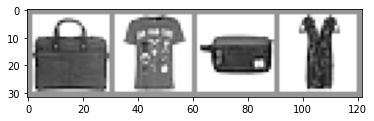

In [9]:
dataiter = iter(training_loader) #Extract a batch of 4 images
images, labels = dataiter.next()

img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
for label in labels:
    print(classes[label])

In [10]:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

#Write image data to TensorBoard log dir
writer.add_image('Four Fashion-MNIST Images', img_grid) 
writer.flush()

To view, start TensorBoard on the command line with: `tensorboard --logdir=runs` and open and borwser tab to http://localhost:6006/.

#### Graphing Scalars to Visualize Training
Tensorboard is useful for tracking the progress and efficacy of your training. Below metrics are tracked and data is saved for TensorBoard's consumption. For readability the Net class is defined in [Class Definitions](#Class-Definitions).

In [11]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
print(len(validation_loader))
for epoch in range(2): #loop over the data set multiple times
    running_loss = 0.0
    
    for i, data in enumerate(training_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i%1000 == 999:
            print(f"Batch {i + 1}")
            running_vloss = 0.0
            
            net.train(False) #don't track gradients for validation
            for j, vdata in enumerate(validation_loader, 0):
                vinputs, vlabels = vdata
                voutputs = net(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()
                
            net.train(True) #turn gradients back on for training
            avg_loss = running_loss/1000
            avg_vloss = running_vloss/len(validation_loader)
            
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(training_loader) + i)
            running_loss = 0.0
print("Finished Training")

writer.flush()

2500
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Batch 13000
Batch 14000
Batch 15000
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Batch 13000
Batch 14000
Batch 15000
Finished Training


This can now be seen in the TensorBaord SCALARS tab.

#### Visualizing Your Model
TensorBoard can also be used to examine the data flow within your model. To do this, call the add_graph() method with a model and sample input. Moving to the GRAPHS tab and double-clicking the "NET" node will show the layers and data flow within the model.

In [13]:
dataiter = iter(training_loader)
images, labels = dataiter.next()

writer.add_graph(net, images)
writer.flush()

#### Visualizing Your dataset with Embeddings
The `add_embedding()` method will project a set of data onto the three dimensions with the highest variance and display them as an interactive 3D chart. This can be done by switching to the PROJECTOR tab.

For better visibility it is recomended to select "label" from "Color by" and to toggle night mode.

In [14]:
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)
    
    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

images, labels = select_n_random(training_set.data, training_set.targets)

class_labels = [classes[label] for label in labels]

features = images.view(-1, 28*28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))

writer.flush()

In [15]:
writer.close()

<br>